In [13]:
import pandas as pd

pd.set_option('display.max_colwidth', None)
df = pd.read_csv('/home/gafur/Documents/Finance/real_estate_nlp/Real-Estate-NLP-Project/data/processed_zillow_reviews.csv') 

#I'll sample proportionally based on existing data distribution
target_size = 60000

sampled_df = df.groupby('Rating').apply(
    lambda x: x.sample(frac=target_size / len(df), random_state=42)
).reset_index(drop=True)

print(sampled_df['Rating'].value_counts())
sampled_df

Rating
5    59539
4      313
1      113
3       20
2       14
Name: count, dtype: int64


/tmp/ipykernel_813517/238425392.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('Rating').apply(


,Rating,Address,ReviewDate,Description,Cleaned_Description
0,1,"7891 Lion St, Rancho Cucamonga, CA 91730",2018-11-29,"The experience with this agent is terrible. I do not feel like she represents me. All she represent is herself who wants a quick commission without adequate effort. Her knowledge, expertise, negotiation skills are so poor. There was a property line dispute but she told me no any problem in that property. After escrow was closed and the neighbor approached me and we found out. But even at that point, she just wanted to protect herself without providing any help to us. She never felt any sorry. Instead she pointed the finger to me and said I should review documents or contact the related persons by myself. In fact, I spent lots of hours to work on the problem. I do not know since I did anything, why I needed her at the beginning. I won't recommend anybody to her.",experience agent terrible feel like represent represent want quick commission adequate effort knowledge expertise negotiation skill poor property line dispute tell problem property escrow close neighbor approach find point want protect provide help feel sorry instead point finger say review document contact related person fact spend lot hour work problem know need beginning will recommend anybody
1,1,"840 E Green St #224 Grant Park - Pasadena, CA 91101",2018-09-26,Had a horrible experience working with Brian. He didn't have any insight into the market and the offer that he directed us to put on the property that we were interested in was 25 K above what the property eventually sold for. He cut down on contingency terms and also was not able to negotiate after inspection was done. He just didn't care and wanted to close a deal. Never work with him.,horrible experience work brian insight market offer direct property interested 25 k property eventually sell cut contingency term able negotiate inspection care want close deal work
2,1,"4817 Parker Ave, Sacramento, CA 95820",2020-07-02,"Very personable and bubbly. Unfortunately, when I hired her to help me buy my first home, she did not competently represent me by failing to relay information, forgetting to have me sign forms and not following my ask to request a seller credit for structural issues uncovered in the inspection. Great attitude and spirit but unfortunately not the Calibur of agent a first time buyer needs to help navigate a very complex and overwhelming process successfully.",personable bubbly unfortunately hire help buy home competently represent fail relay information forget sign form follow ask request seller credit structural issue uncover inspection great attitude spirit unfortunately calibur agent time buyer need help navigate complex overwhelming process successfully
3,1,"2266 Caminito Pescado UNIT 26, San Diego, CA 92107",2016-12-19,"Natalie convinced my husband and I to allow her to present our ""offer"" to the owners of a home she had listed. Against our better judgment we allowed her to represent us, as well as the seller. She was unprofessional and dishonest in the handling of our transaction. She insisted that she was ""doing everything she could"" to ""make it work."" The transaction (thankfully) did not go through, as we would have likely been severely further prejudiced by having Natalie represent us. Thankfully we found an honest and amazing agent to work with after this terrible experience!",natalie convince husband allow present offer owner home list well judgment allow represent seller unprofessional dishonest handling transaction insist work transaction thankfully likely severely prejudice have natalie represent thankfully find honest amazing agent work terrible experience
4,1,"659 Weng Star St, Beaumont, CA 92223",2016-01-05,After we decided on the home we wanted to purchase she completely pushed us to the side. As first time home buyers we felt neglected and uncared for. She was always too busy with other clients. Difficult to contact and took days to respond back even tho

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting bigrams and trigrams from the cleaned 'Description' column
vectorizer = CountVectorizer(ngram_range=(3, 4), max_features=50)  # tweak max_features as needed
X = vectorizer.fit_transform(sampled_df['Cleaned_Description'])

# Convert to DataFrame for easy inspection
ngram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [15]:
# Get total frequencies of each n-gram
ngram_freq = ngram_df.sum().sort_values(ascending=False)

print("Top N-grams:")
print(ngram_freq.head(15))


Top N-grams:
time home buyer              4652
real estate agent            4625
home buying process          3809
find perfect home            2403
home buying experience       1993
find dream home              1877
buy sell home                1566
real estate market           1515
help find home               1416
real estate need             1404
look buy sell                1317
available answer question    1231
help buy home                1172
help find perfect            1125
help purchase home            954
dtype: int64


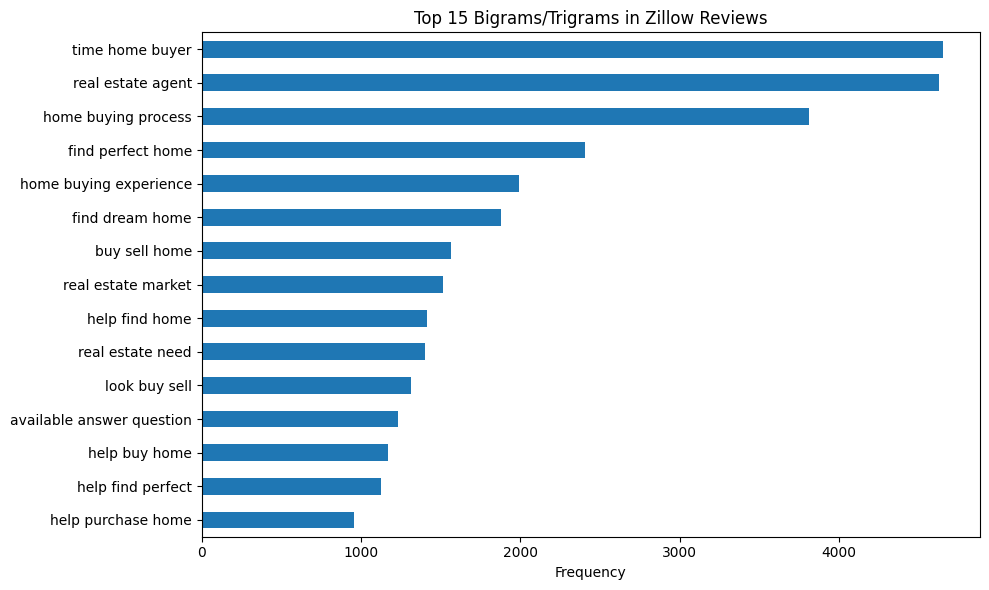

In [16]:
import matplotlib.pyplot as plt

top_n = 15
ngram_freq.head(top_n).plot(kind='barh', figsize=(10, 6))
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Bigrams/Trigrams in Zillow Reviews")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()



In [17]:
rating_groups = sampled_df.groupby('Rating')

for rating, group in rating_groups:
    vectorizer = CountVectorizer(ngram_range=(3, 4), max_features=20)
    X = vectorizer.fit_transform(group['Description'])
    ngram_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum()
    
    print(f"\nTop n-grams for Rating {rating}:\n", ngram_freq.sort_values(ascending=False).head(10))



Top n-grams for Rating 1:
 would not recommend    13
she did not            13
real estate agent      12
we had to              11
my wife and            10
first time home         9
the house was           9
close of escrow         8
do not recommend        7
we did not              7
dtype: int64

Top n-grams for Rating 2:
 the seller and         4
were supposed to       3
we were supposed to    3
looking to buy         3
we were supposed       3
pay for the            3
peter and pat          3
she told me            3
day of the             3
that the seller        3
dtype: int64

Top n-grams for Rating 3:
 would have been           3
to work with              3
the final inspection      3
always there to answer    2
what she does             2
us the buyer              2
to look at                2
time home buyers          2
the job done              2
the agent was             2
dtype: int64

Top n-grams for Rating 4:
 to work with              43
was able to               29
w